In [9]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [10]:
import numpy as np      
import pandas as pd

In [55]:
import seaborn as sb
import matplotlib.pyplot as plt


Descriptive Data Analysis

In [56]:
df = pd.read_csv(r"BTC-USD-2014-2024.csv")

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0


In [57]:
df.shape


(3413, 7)

In [58]:
df.describe() 

,Open,High,Low,Close,Adj Close,Volume
count,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3.412000e+03
mean,14747.360368,15091.809098,14376.126435,14758.111980,14758.111980,1.663026e+10
std,16293.633702,16683.948248,15855.901350,16295.374063,16295.374063,1.907607e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,921.790009,935.210266,908.876495,921.739258,921.739258,1.685530e+08
50%,8288.819824,8464.720703,8108.011475,8285.438965,8285.438965,1.176004e+10
75%,24345.831543,24986.300293,23907.724610,24382.675293,24382.675293,2.697648e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3413 entries, 0 to 3412
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3413 non-null   object 
 1   Open       3412 non-null   float64
 2   High       3412 non-null   float64
 3   Low        3412 non-null   float64
 4   Close      3412 non-null   float64
 5   Adj Close  3412 non-null   float64
 6   Volume     3412 non-null   float64
dtypes: float64(6), object(1)
memory usage: 186.8+ KB


Exploratory Data Analysis

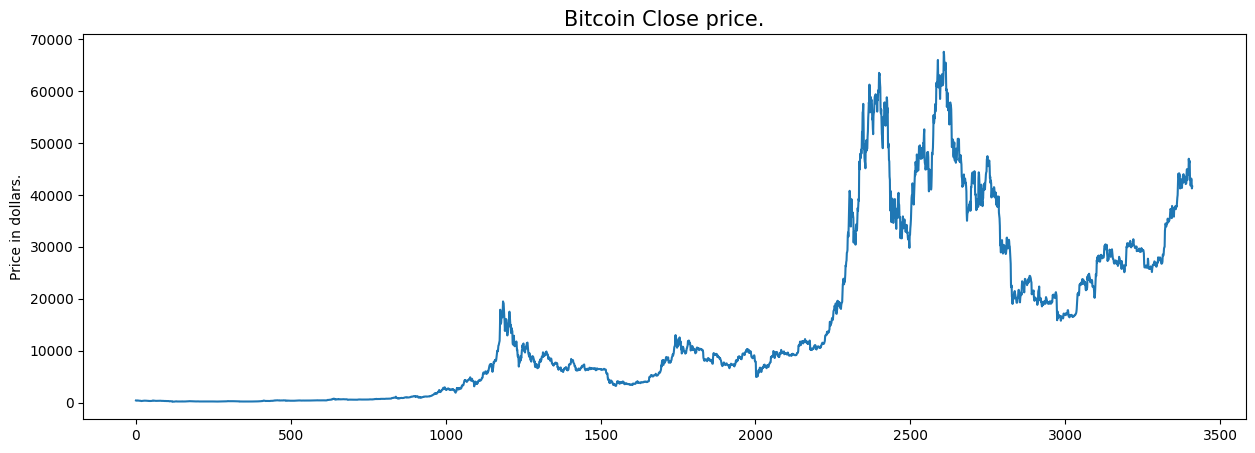

In [60]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [61]:
df[df['Close'] == df['Adj Close']].shape, df.shape 

((3412, 7), (3413, 7))

In [62]:
df = df.drop(['Adj Close'], axis=1) #Coloumn is dropped because we have same data in close price and adjusted close price

In [63]:
df.isnull().sum()

Date      0
Open      1
High      1
Low       1
Close     1
Volume    1
dtype: int64

In [64]:
# Drop columns with any null values
df = df.dropna()

In [65]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

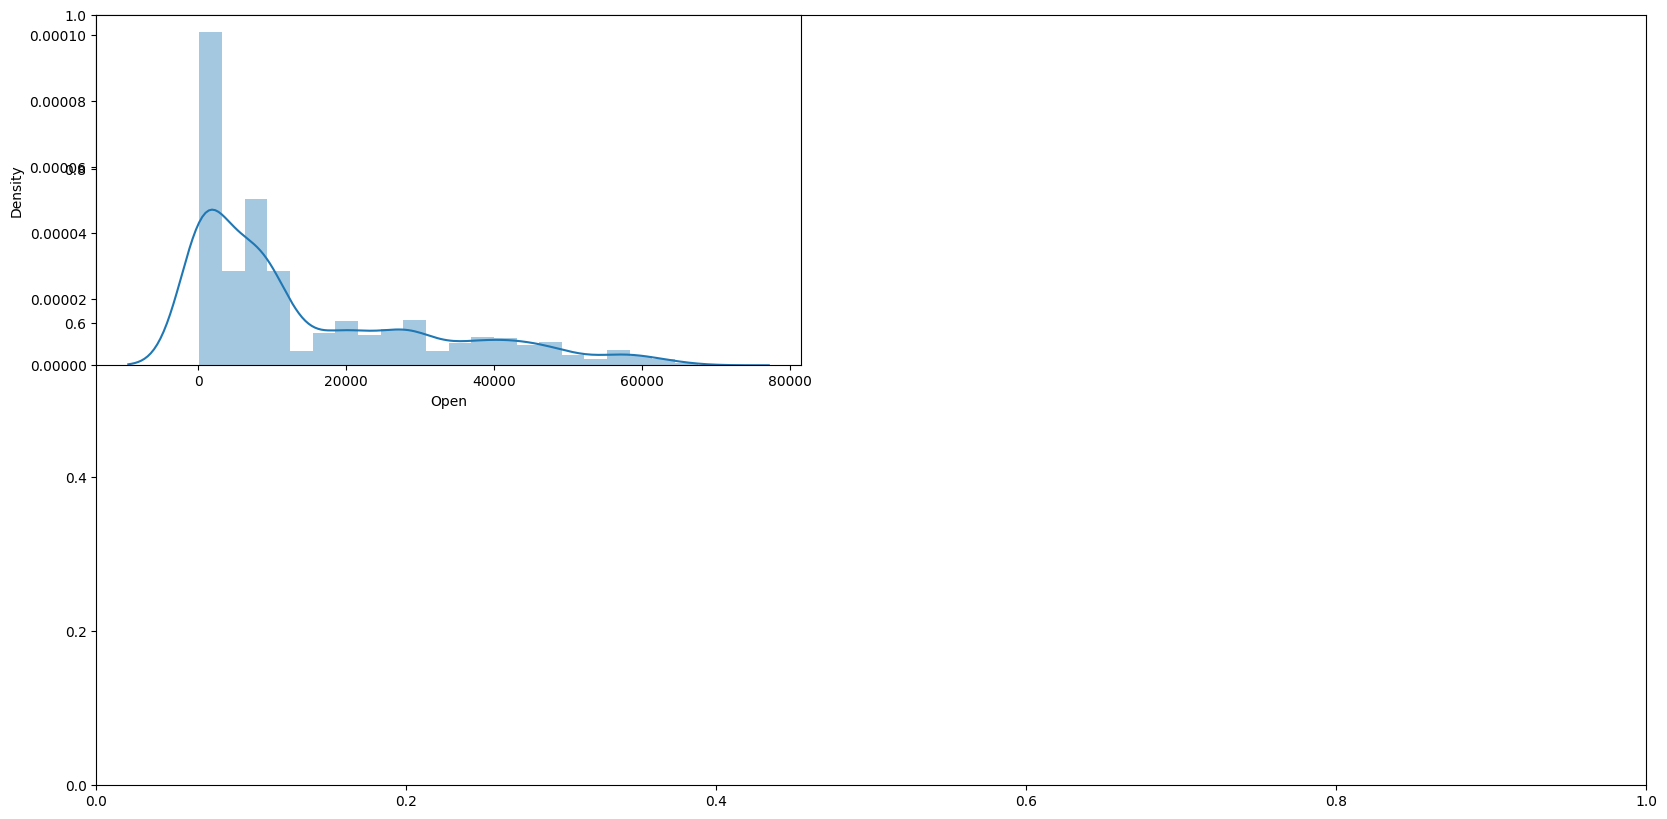

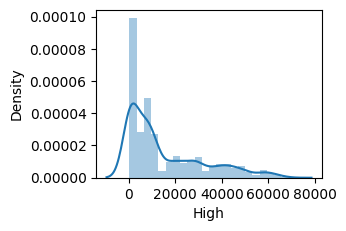

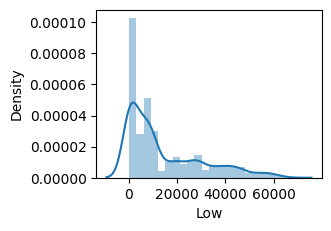

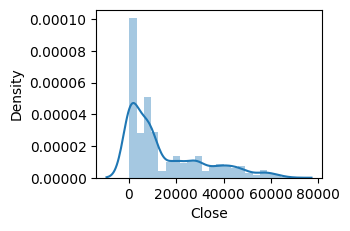

In [66]:
features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df[col])
  plt.show()

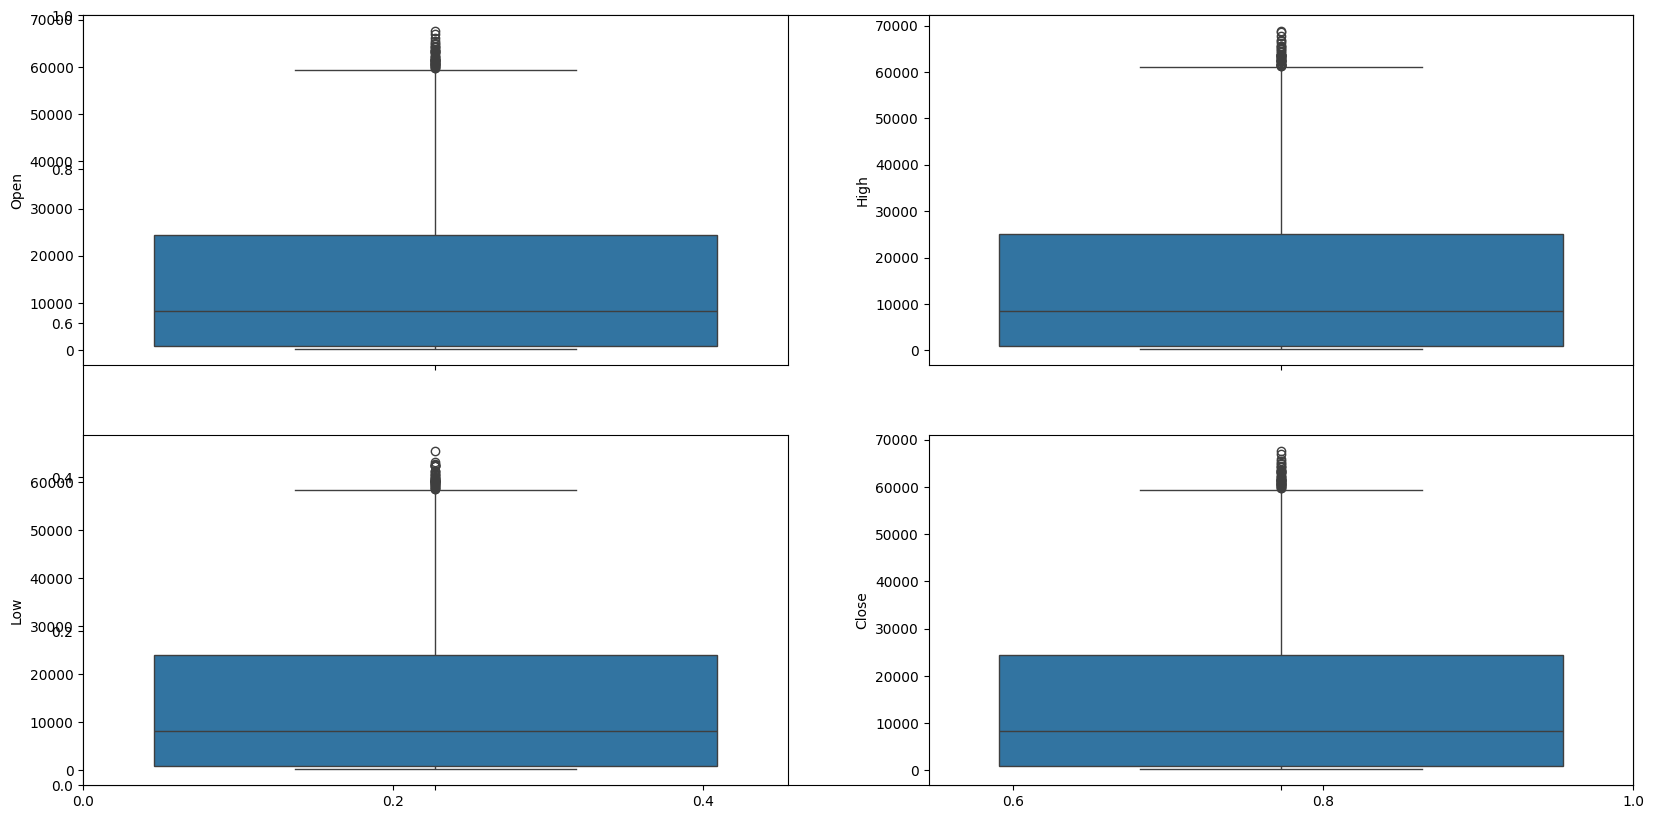

In [67]:
plt.subplots(figsize=(20,10)) #because the fluctuation in data was very high so we need to draw a box plot as well so outliers can be separated
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.boxplot(df[col])
plt.show()

Feature Engineering

In [68]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0,2014,9,18
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0,2014,9,19
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0,2014,9,20
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0,2014,9,21
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,24127600.0,2014,9,22


In [69]:
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

In [70]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year


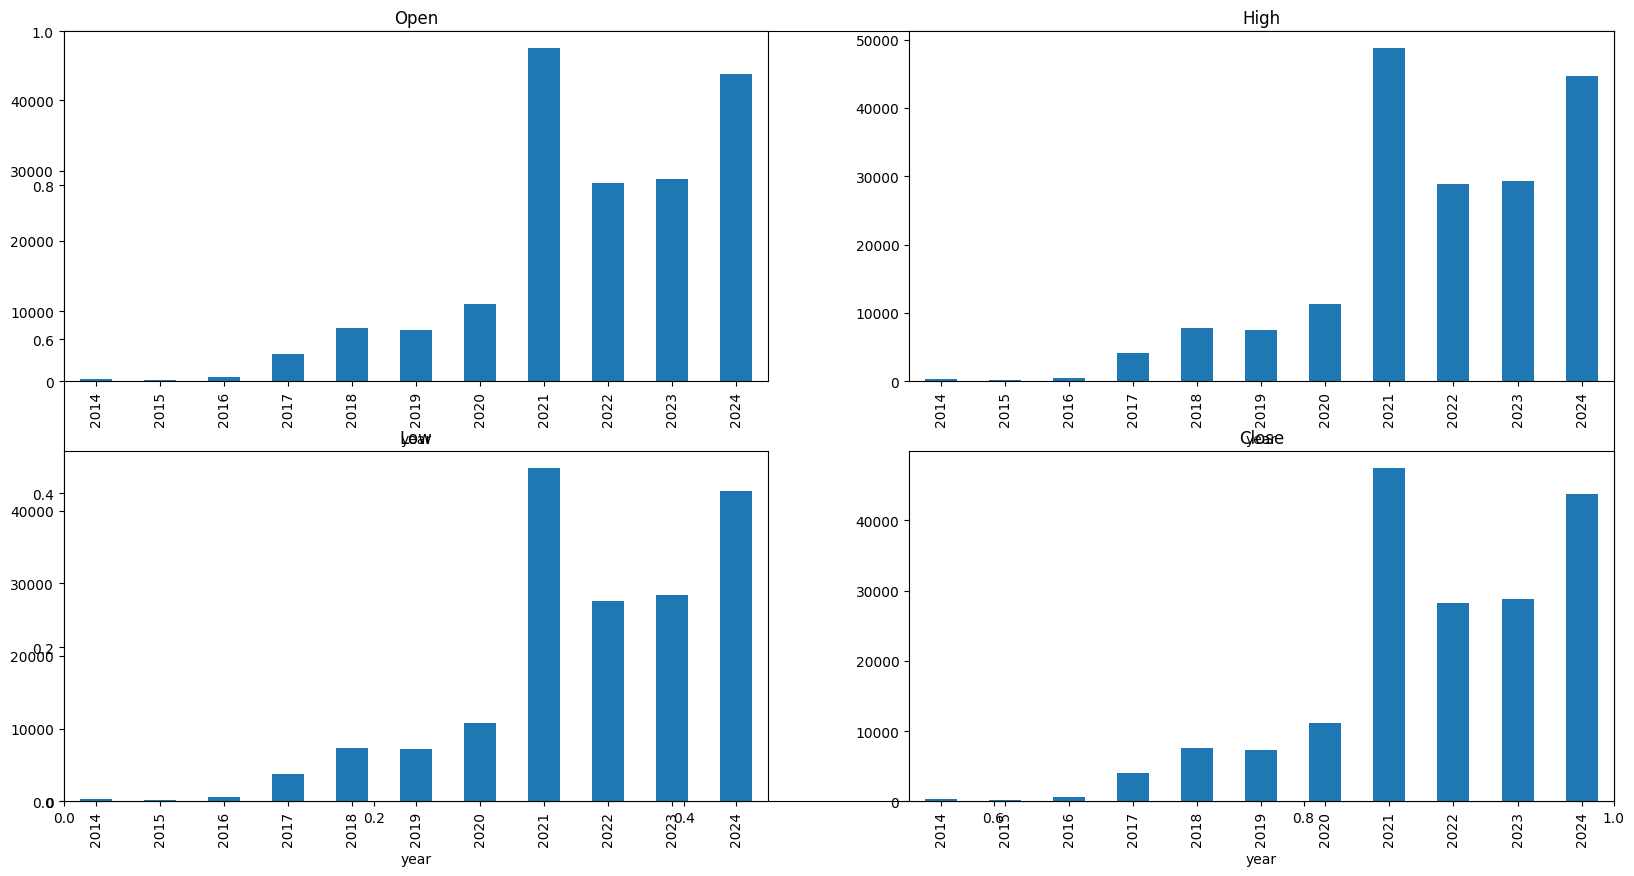

In [71]:
data_grouped = df.groupby('year').mean() #Here we can observe why there are so many outliers in the data even though Bitcoin prices have exploded in 2021.
plt.subplots(figsize=(20, 10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    data_grouped[col].plot.bar()
    plt.title(col)
plt.show()

In [72]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0,2014,9,18,1
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0,2014,9,19,1
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0,2014,9,20,1
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0,2014,9,21,1
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,24127600.0,2014,9,22,1


In [73]:
df['open-close'] = df['Open'] - df['Close'] #Above, we have added some more columns that will help in training our model. We have added the objective function which is a signal whether to buy or not. We will train our model to predict only this.
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

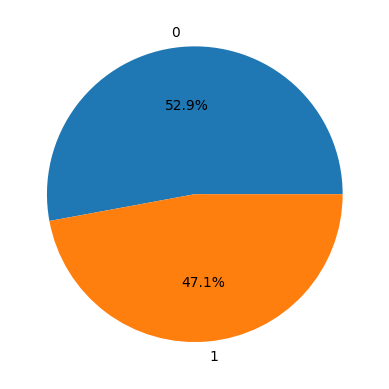

In [74]:
plt.pie(df['target'].value_counts().values, #Pie chart for data distribution across two labels
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


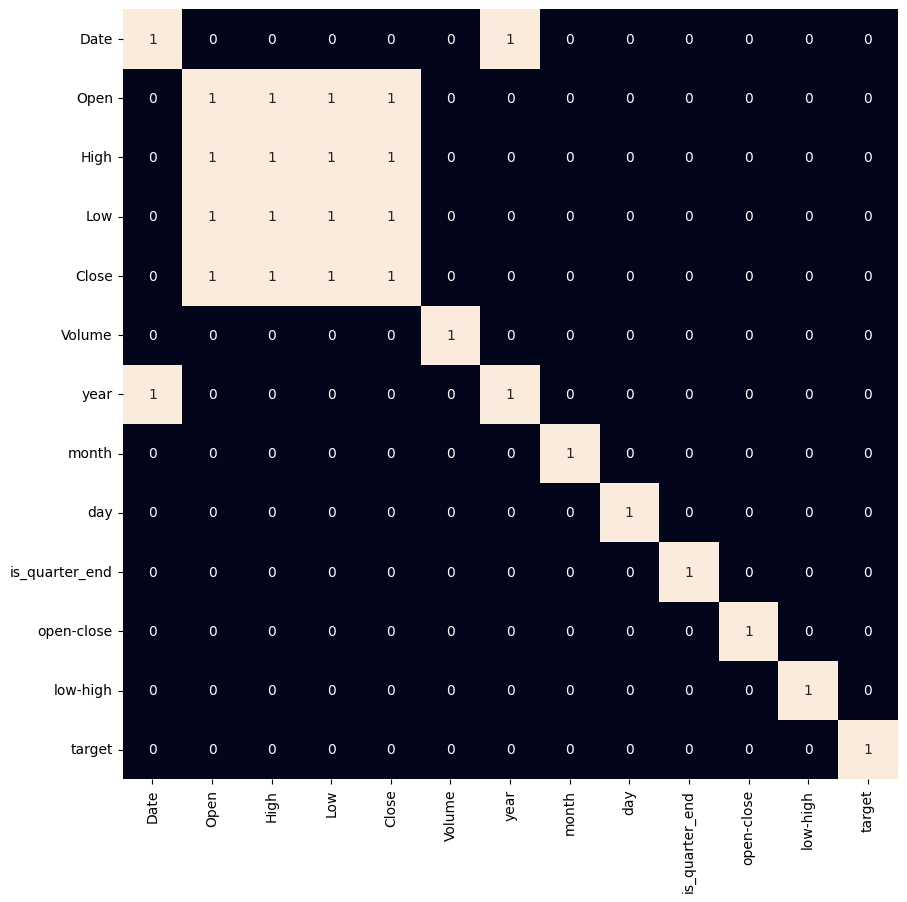

In [75]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [76]:
features = df[['open-close', 'low-high', 'is_quarter_end']] #Data Normalization
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(3070, 3) (342, 3)


Model Development and Evaluation

In [ ]:
models = LogisticRegression()

models.fit(X_train, Y_train)

print(f'{models} : ')
print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models.predict_proba(X_train)[:,1]))
print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models.predict_proba(X_valid)[:,1]))
print()
import joblib

# Assuming `models` is your trained logistic regression model
joblib.dump(models, 'logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


LogisticRegression() : 
Training Accuracy :  0.533229595122799
Validation Accuracy :  0.5376819037835987



['scaler.pkl']

In [ ]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import joblib
joblib.dump(models, 'bitcoin_model.pkl')

['bitcoin_model.pkl']

In [ ]:
import os
import tempfile
streamlit_code = """
import numpy as np
import pandas as pd
import joblib
import streamlit as st

model = joblib.load('bitcoin_model.pkl')
scaler = joblib.load('scaler.pkl')

st.title('Bitcoin Price Prediction')

st.write('Enter the following data to get a prediction on whether Bitcoin price will go up or down:')

open_price = st.number_input('Open Price', min_value=0.0, format='%.2f')
high_price = st.number_input('High Price', min_value=0.0, format='%.2f')
low_price = st.number_input('Low Price', min_value=0.0, format='%.2f')
close_price = st.number_input('Close Price', min_value=0.0, format='%.2f')

is_quarter_end = st.selectbox('Is it a quarter end?', [0, 1])


open_close = open_price - close_price
low_high = low_price - high_price

input_features = np.array([[open_close, low_high, is_quarter_end]])


input_features = scaler.transform(input_features)

# Prediction
if st.button('Predict'):
    prediction = model.predict(input_features)[0]
    prediction_proba = model.predict_proba(input_features)[0, 1]
    
    if prediction == 1:
        st.write('**Prediction:** Bitcoin price is expected to go up.')
    else:
        st.write('**Prediction:** Bitcoin price is expected to go down.')

    st.write(f'**Probability of Increase:** {prediction_proba:.2f}')
"""


with tempfile.NamedTemporaryFile(delete=False, suffix='.py') as temp_file:
    temp_file.write(streamlit_code.encode())
    temp_file_path = temp_file.name

temp_file_path


'C:\\Users\\HP\\AppData\\Local\\Temp\\tmpvj39hhrx.py'

In [ ]:
#import os
# Run the Streamlit app using the temporary file created above
#os.system(f'streamlit run {temp_file_path}')